In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
from wordcloud import WordCloud
mpl.rcParams['font.sans-serif']=['SimHei']
import csv
import math
import seaborn as sns

In [5]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
import missingno as msno

In [3]:
data = pd.read_csv('./data/diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

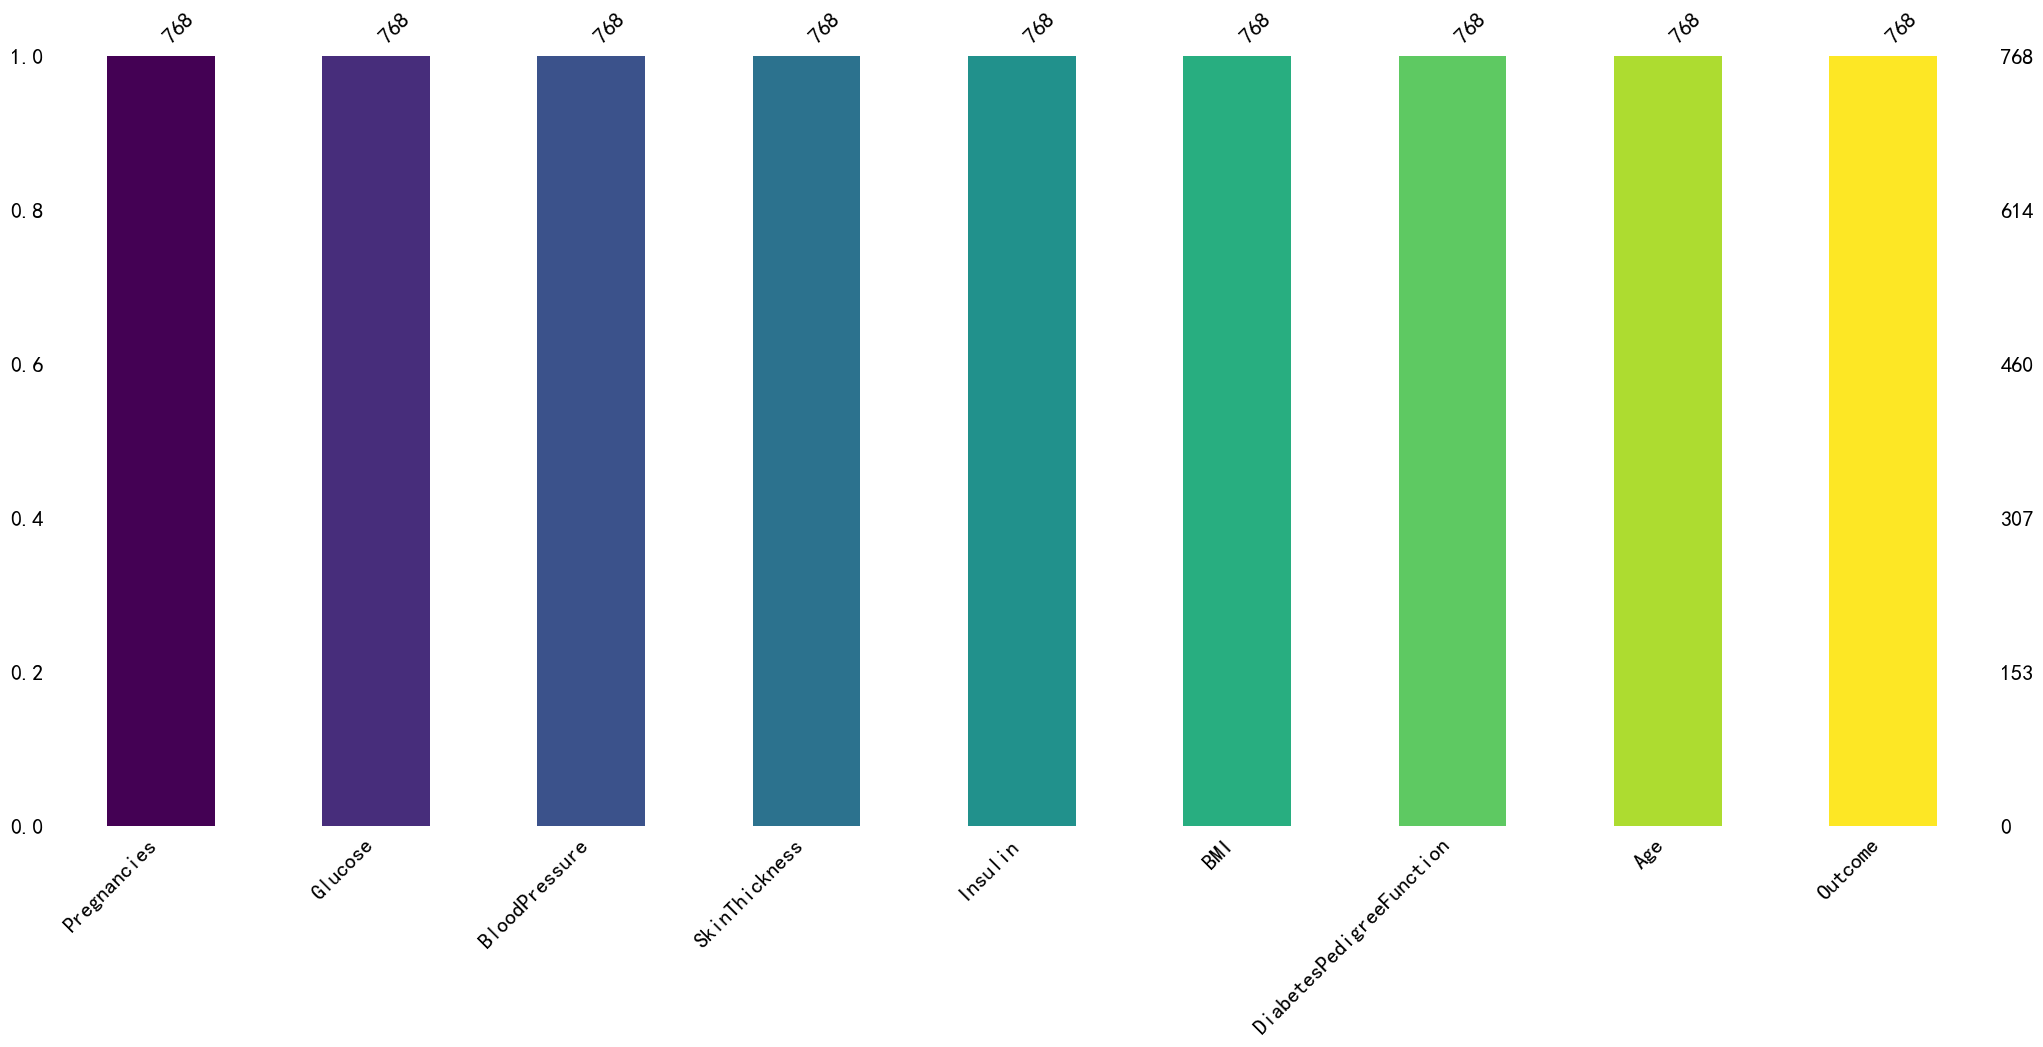

In [5]:
import missingno as msno
num_columns = len(data.columns)
colors = plt.cm.viridis(np.linspace(0,1,num_columns))
msno.bar(data,color = colors)
plt.show()

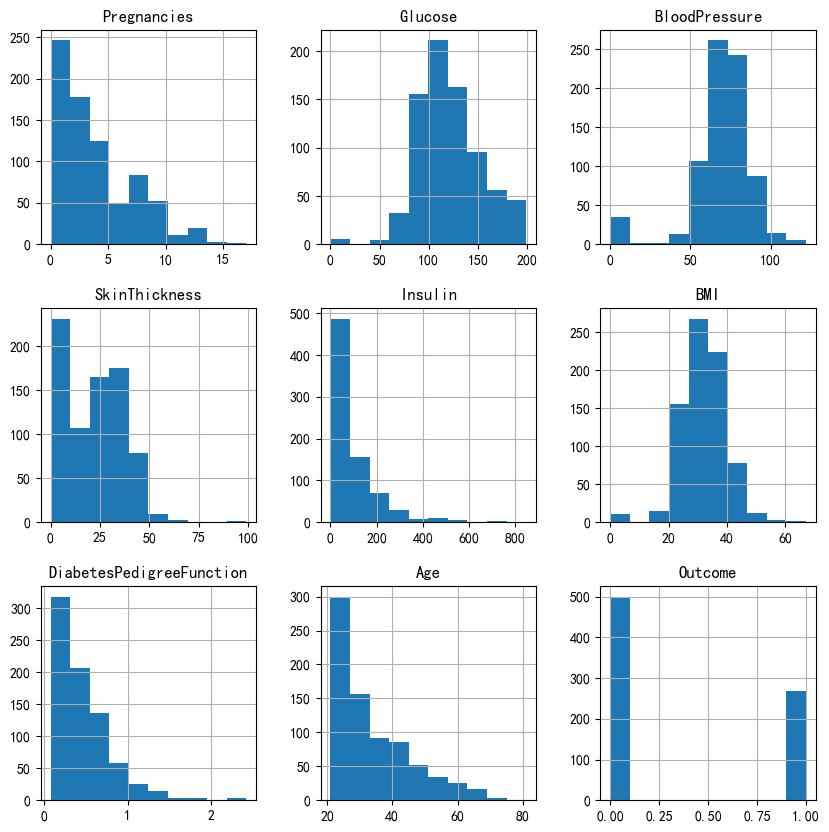

In [6]:
data.hist(figsize = (10,10))
plt.show()

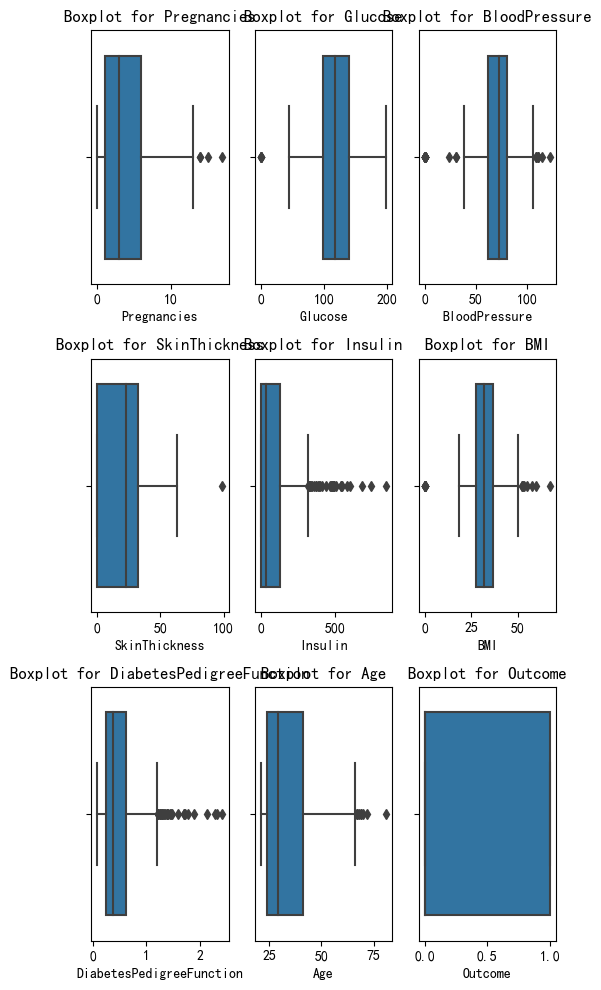

In [12]:
num_rows,num_cols=3,3
fig,axes=plt.subplots(num_rows,num_cols,figsize=(5,10))

axes=axes.flatten()

for i,columns in enumerate(data.columns):
    sns.boxplot(data=data,x=columns,ax=axes[i])
    axes[i].set_title(f'Boxplot for {columns}')
plt.tight_layout()
plt.show()

D:\anaconda_files\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


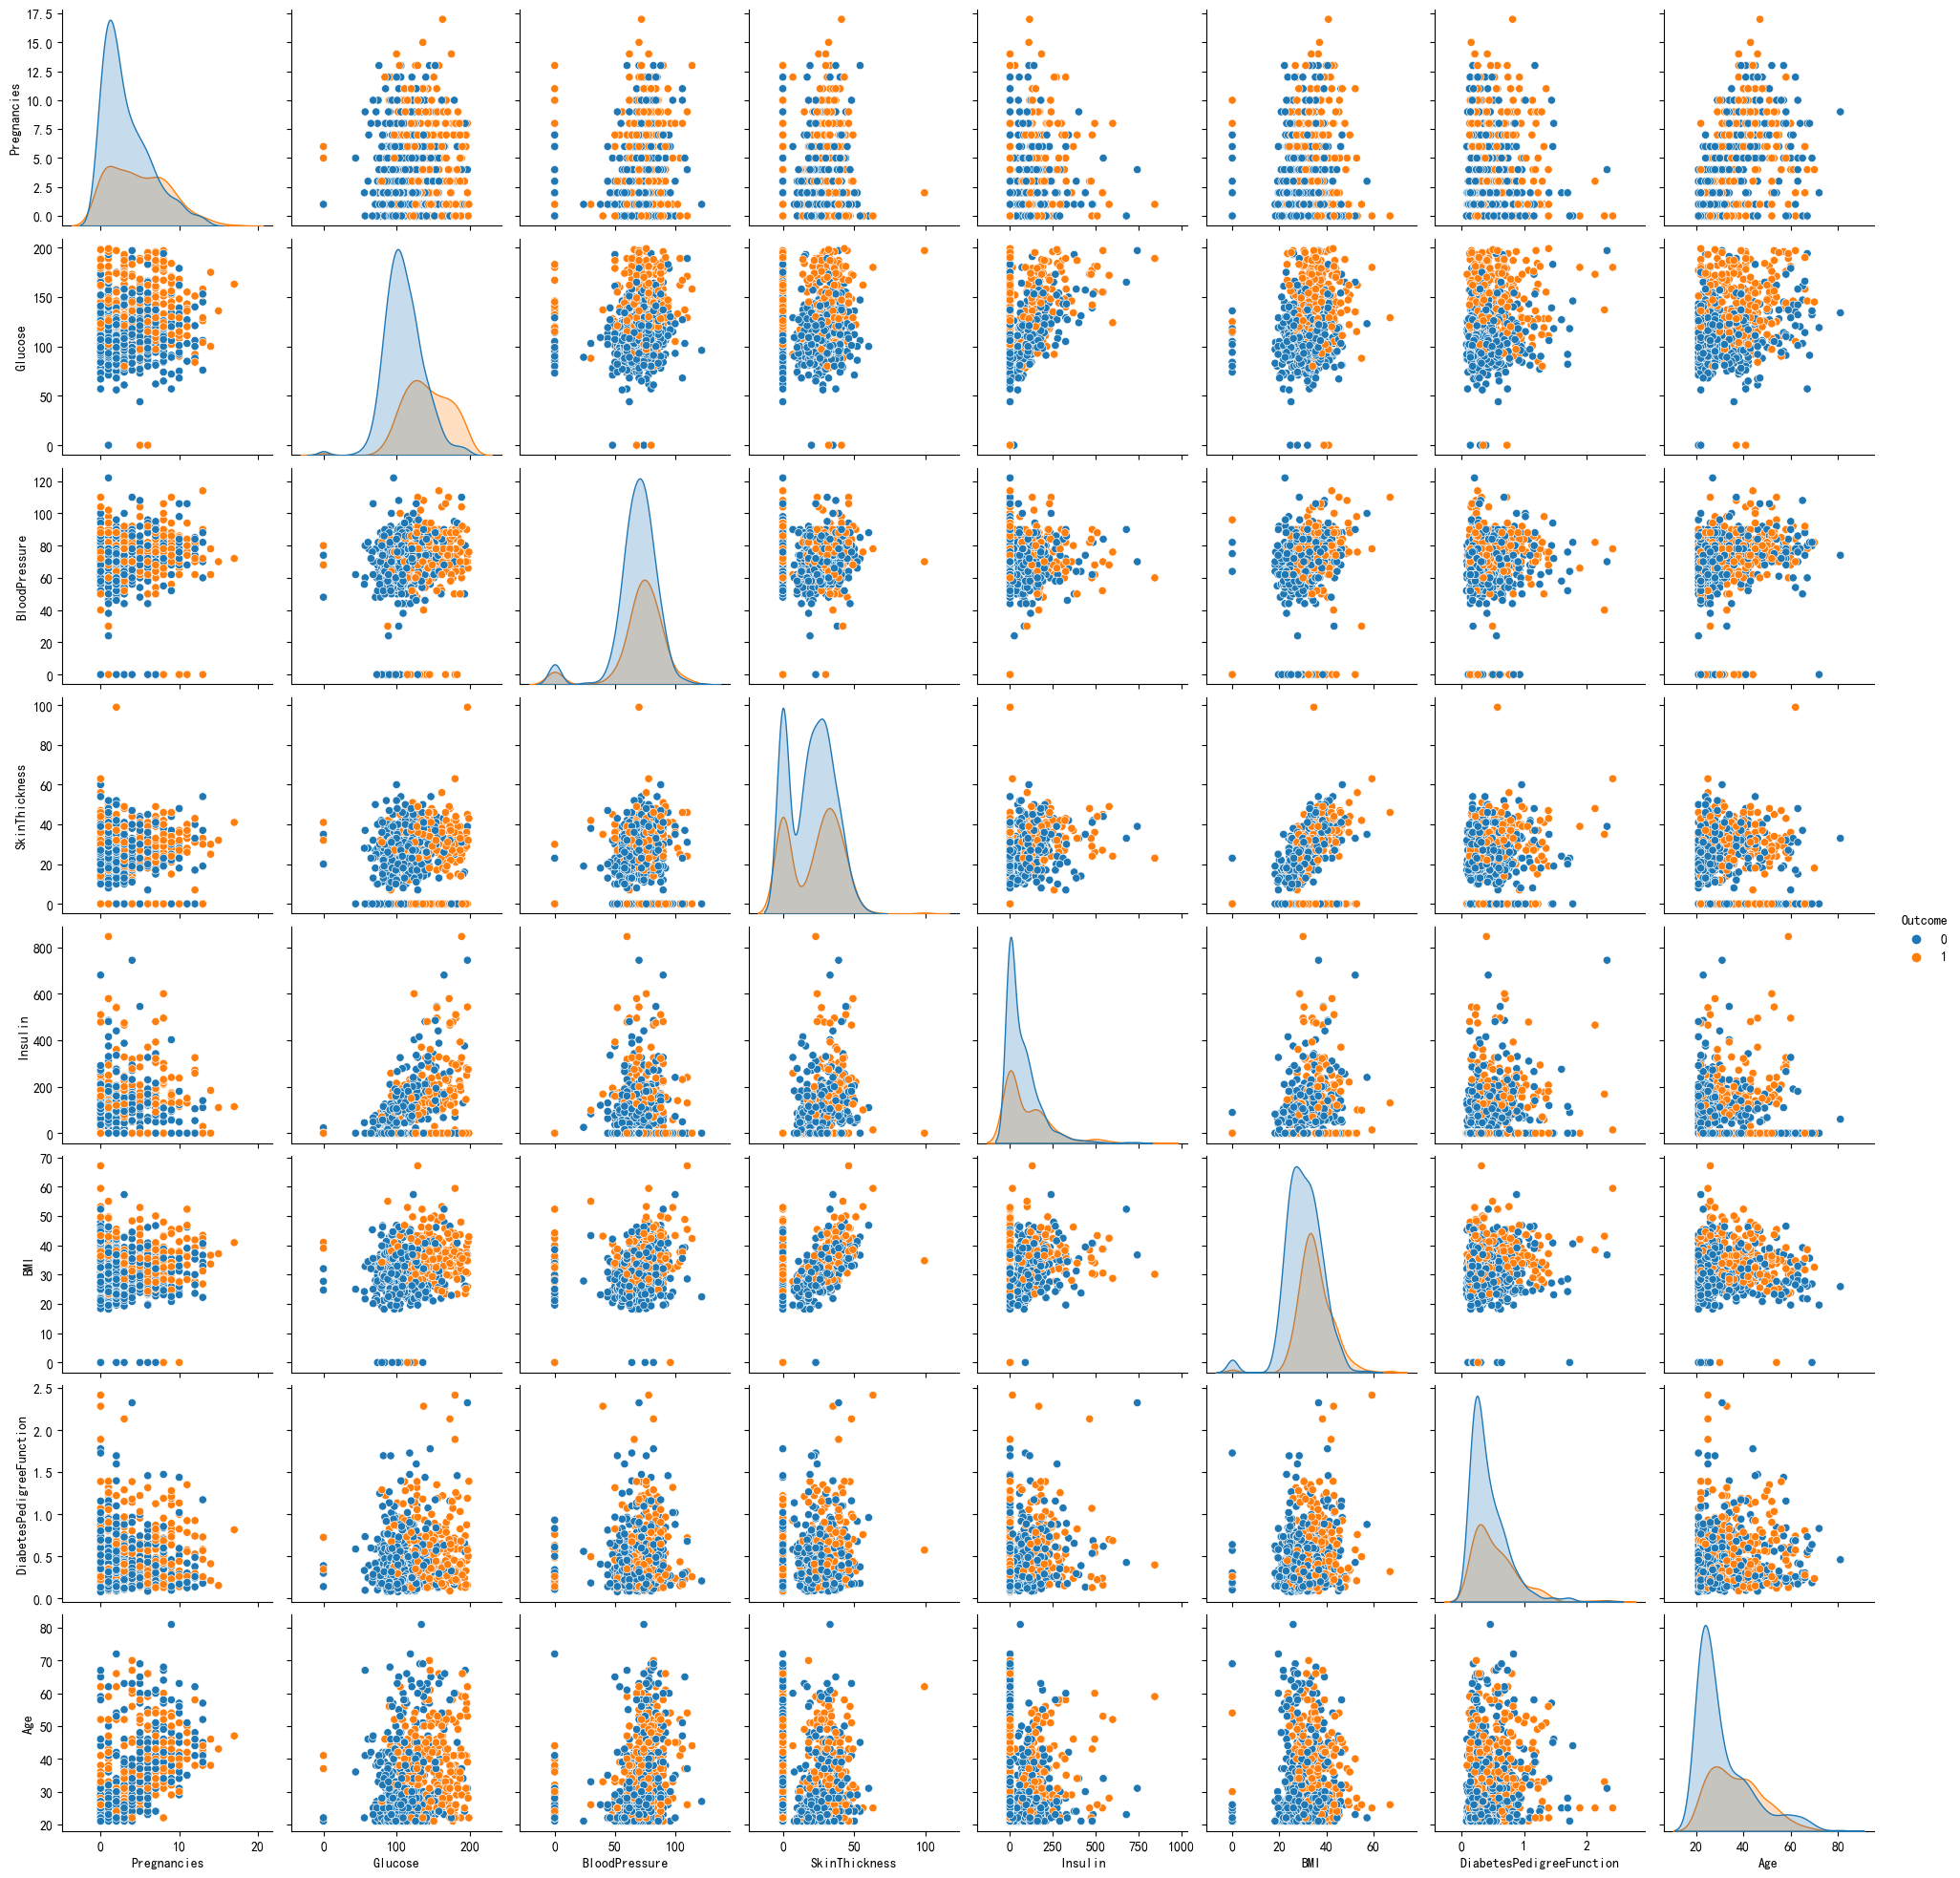

In [13]:
sns.pairplot(data=data,hue='Outcome')
plt.show()

<Axes: >

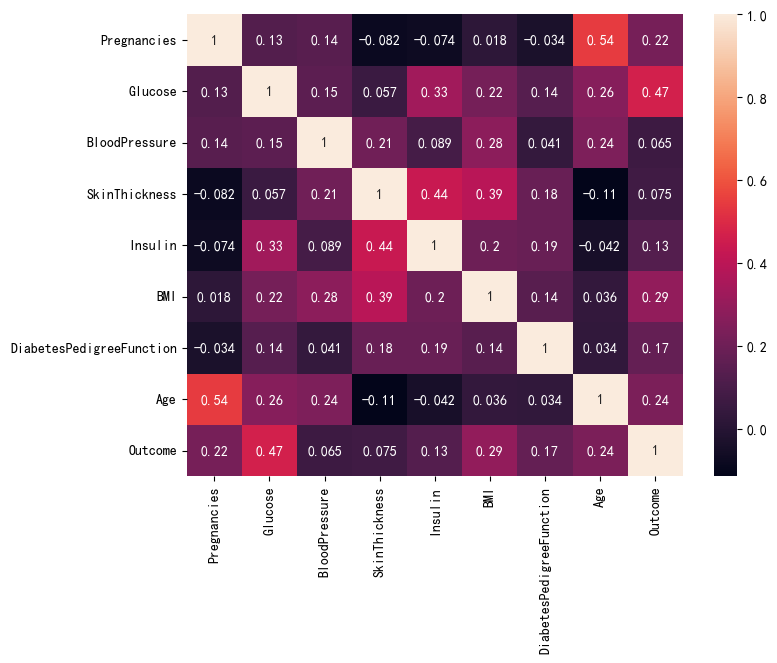

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)

D:\anaconda_files\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

D:\anaconda_files\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
D:\anaconda_files\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


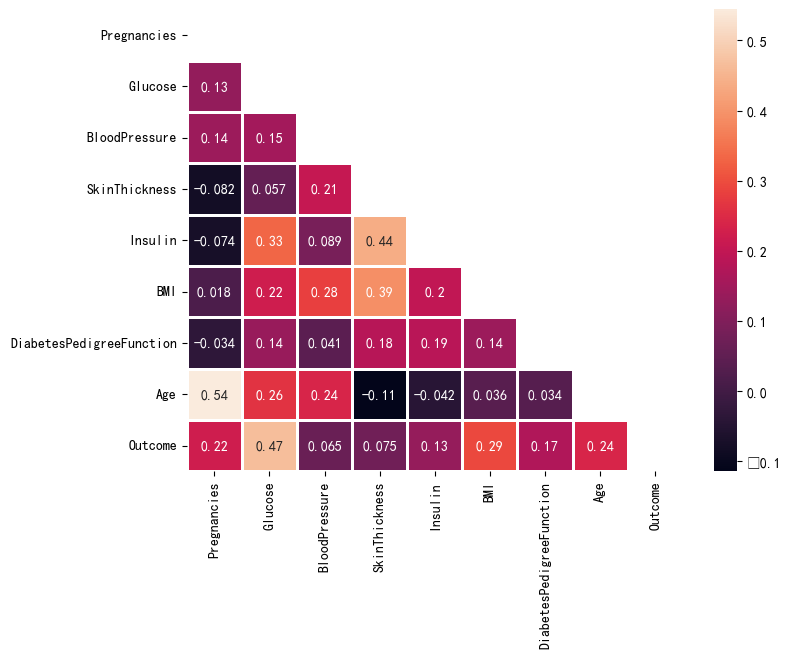

In [16]:
plt.figure(figsize = (8,6))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(),annot = True,linewidth =.8,mask = matrix,cmap = 'rocket')

In [17]:
hig_corr = data.corr()
hig_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [19]:
hig_corr_features=hig_corr.index[abs(hig_corr['Outcome'])>=0.2]
hig_corr_features

Index(['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome'], dtype='object')

In [21]:
data.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [22]:
numeric_columns=['Insulin','DiabetesPedigreeFunction',]

In [24]:
for column_name in numeric_columns:
    Q1=np.percentile(data[column_name],25,interpolation='midpoint')
    Q3=np.percentile(data[column_name],75,interpolation='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=data[(data[column_name]<low_lim)|(data[column_name]>up_lim)][column_name]
    data[column_name]=np.where(data[column_name] < low_lim,low_lim,data[column_name])
    data[column_name]=np.where(data[column_name] > up_lim,up_lim,data[column_name])

C:\Users\86139\AppData\Local\Temp\ipykernel_11156\3343901725.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data[column_name],25,interpolation='midpoint')
C:\Users\86139\AppData\Local\Temp\ipykernel_11156\3343901725.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.percentile(data[column_name],75,interpolation='midpoint')


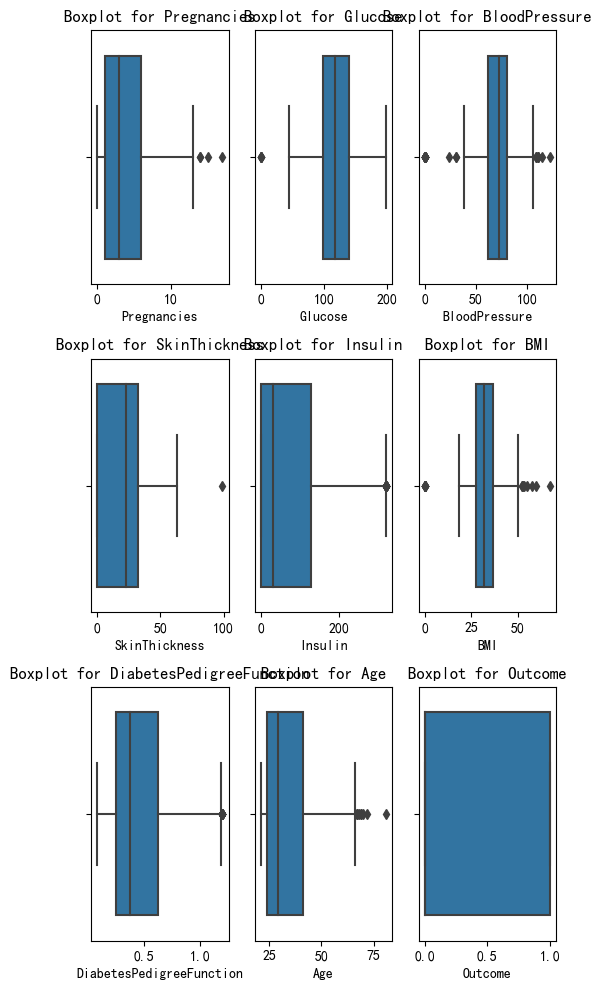

In [25]:
num_rows,num_cols=3,3
fig,axes=plt.subplots(num_rows,num_cols,figsize=(5,10))

axes=axes.flatten()

for i,columns in enumerate(data.columns):
    sns.boxplot(data=data,x=columns,ax=axes[i])
    axes[i].set_title(f'Boxplot for {columns}')
plt.tight_layout()
plt.show()

In [26]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
type(x_train)
type(y_train)

pandas.core.series.Series

In [66]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C =1,penalty ='l2',solver = 'liblinear',max_iter =300)
log_reg.fit(x_train,y_train)

LogisticRegression(C=1, max_iter=300, solver='liblinear')

In [67]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0.0,33.6,0.627,50
1,1,85,66,29,0.0,26.6,0.351,31
2,8,183,64,0,0.0,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,1.201,33


In [68]:
x_train.shape

(614, 8)

Accuracy:76.22)%
Accuracy:81.17)%


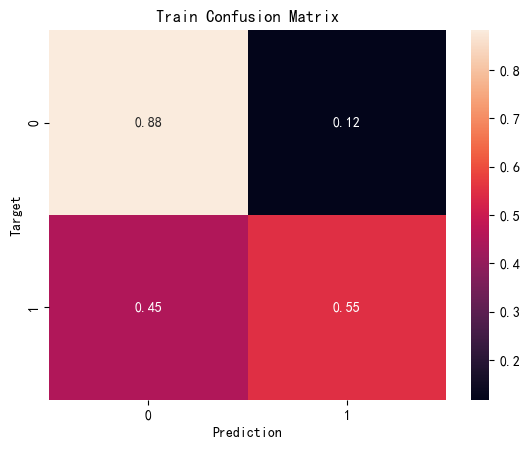

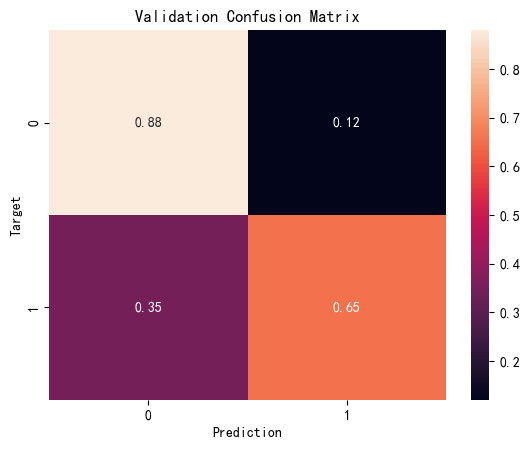

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score 
import matplotlib.pyplot as p1t 
import seaborn as sns 
def predict_and_plot(model, inputs, targets, name=''):
    preds =model.predict(inputs) 
    #计算预测结关的准确率
    accuracy=accuracy_score(targets, preds) 
     #打印准确率，以百分比形式显示
    print ("Accuracy:{:.2f})%".format(accuracy*100)) 
    #计算标准化的混湾矩阵
    cf= confusion_matrix(targets, preds, normalize='true') 
    plt.figure()
     #使用5eabonn绘制馄烯矩阵的热图，并在每个单元格中注释数值
    sns.heatmap(cf, annot=True) 
    plt.xlabel( 'Prediction') 
    plt.ylabel('Target') 
    plt.title('{} Confusion Matrix'.format(name))
    return preds

train_preds=predict_and_plot(log_reg,x_train,y_train,'Train')
val_preds=predict_and_plot(log_reg,x_test,y_test,'Validation')